{{< image classes="center" src="../../../r2py.png" thumbnail="../../../r2py.png" thumbnail-width="180px" thumbnail-height="180px">}}


- [1 of 8: IDE]( {{< relref "2018-08-21-r2py_ide.md" >}}  )
- [2 of 8: pandas]( {{< relref "2018-08-22-r2py_pandas.md" >}}  )
- [3 of 8: matplotlib and seaborn]( {{< relref "2018-08-23-r2py_matplotlib_seaborn.md" >}}  )

<!-- toc -->


# Visualisations in `python`

In `R` I am used to work with a combination of `ggplot2` and `plotly`. It seems that in `python` you have `matplotlib` which is fully integrated into `pandas` and you have `seaborn` which provides some pretty default setting for most of `matplotlib`'s standard graph types.

The main difference of `matplotlib` to `ggplot2` is that it is optimised for wide formatted data tables while `ggplot2` is optimised for data in the long format. In matplotlib we we woul iterate over every column that we would want to add to our plot while in ggplot we would define x and y measurements and then select a grouping or facetting variable.


# `seaborn`

`seaborn` is built on top of matplotlib it provides some pretty decent defaults for `matplotlib` and has a stunning [example gallery](https://seaborn.pydata.org/examples/index.html). `seaborn` supports long and wide format as input.

[tutorial](https://elitedatascience.com/python-seaborn-tutorial)

In [1]:
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns

df = sns.load_dataset('iris')


## Scatter Plots

### `sns.lmplot()`

This is in fact a scatter plot function, we just have to turn of the regression fit. 

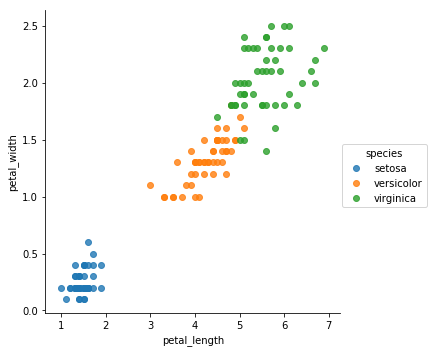

In [12]:
sns.lmplot(x = 'petal_length', y = 'petal_width', data = df
           , hue = 'species'
           , fit_reg = False)

### Compare to `matplotlib` method `plt.scatter()`

is a lot more complicated, we have to add each species manually to an axes supplot object. This is very inconvenient.

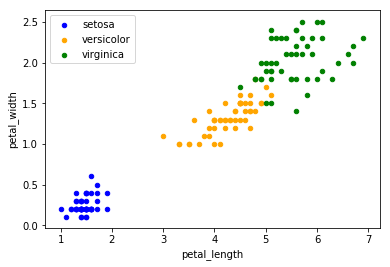

In [3]:
# old school
ax = df.loc[ df['species'] == 'setosa', : ].plot.scatter('petal_length', 'petal_width', label = 'setosa', color = 'blue')

# functional indexing
ax = df.query('species == "versicolor"') \
    .plot.scatter( 'petal_length', 'petal_width'
                  , label = 'versicolor'
                  , color = 'orange' 
                  , ax = ax )
    
ax = df.query('species == "virginica"') \
    .plot.scatter( 'petal_length', 'petal_width'
                  , label = 'virginica'
                  , color = 'green' 
                  , ax = ax ) 



## Boxplots

### From wide format

here we cannot use hue to assign groups to colors

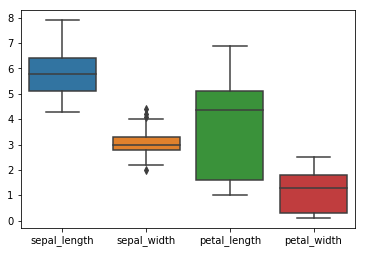

In [4]:
sns.boxplot(data=df)

### From short format

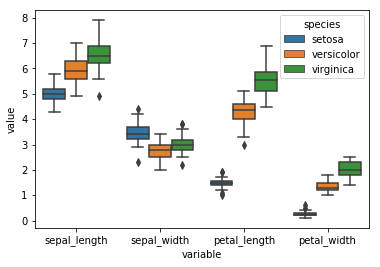

In [5]:
df_melt = df.melt(value_vars=['sepal_length', 'sepal_width', 'petal_length', 'petal_width']
                 , id_vars = 'species')


sns.boxplot('variable', 'value', data = df_melt, hue = 'species')

## Overlay Plots

We can easily overlay plots as follows. The problem is that nevertheless the plot order is a bot messed up and there is no option to change the color of the box outline to black. Probably in order to fix this we would need to iterate over the box outlines and set their color attribute to 'black' which is a bit of a pain in the ass.

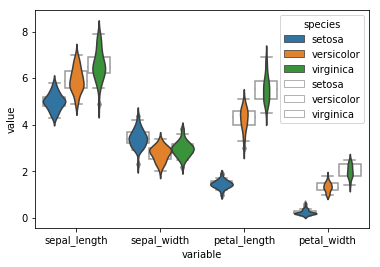

In [6]:


sns.violinplot('variable', 'value', data = df_melt
               , hue = 'species'
               , inner = None ## removes inner boxes
               , zorder = 1
              )

sns.boxplot('variable', 'value', data = df_melt
            , hue = 'species'
            , palette = ['#FFFFFF','#FFFFFF','#FFFFFF']
            , saturation = 1
            , zorder = -1 ## send boxplot to background
           )

## Factor Plots (facetting)

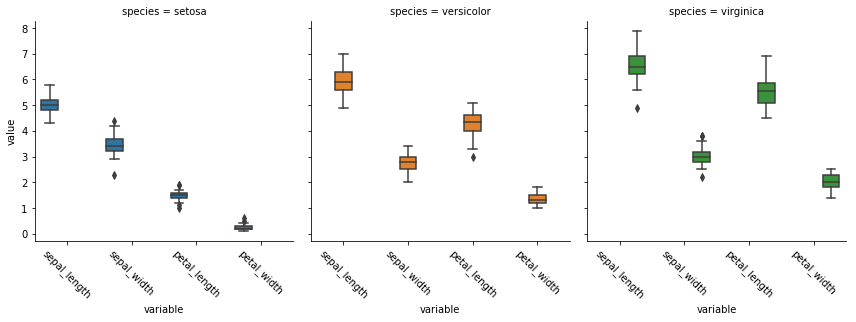

In [7]:
ax = sns.factorplot('variable', 'value', data = df_melt
              , hue = 'species'
              , col = 'species'
              , kind = 'box' )

ax.set_xticklabels(rotation = -45)

## Customize Plots with `matplotlib`
All seaborn plots can be tweaked and edited using `matplolib`, for example we can add a title and limit the range of the x-axis.

Text(0.5,1,'Look at my custom plot')

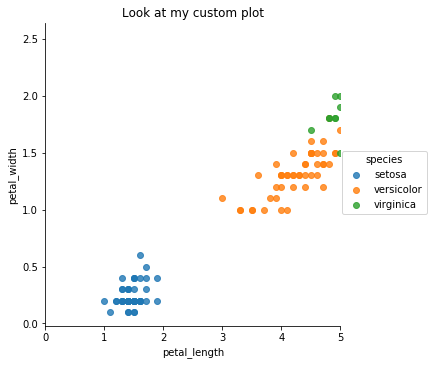

In [8]:
sns.lmplot(x = 'petal_length', y = 'petal_width', data = df
           , hue = 'species'
           , fit_reg = False)

plt.xlim(0,5)
plt.title('Look at my custom plot')

We can also fix the overlay plot from before

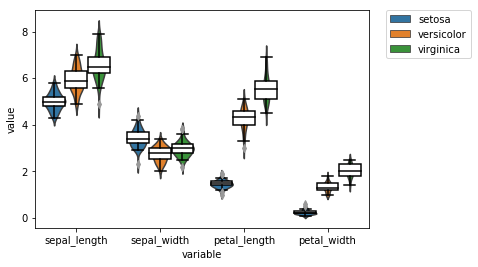

In [9]:
# instantiate axis and figure
fig, ax = plt.subplots()

ax = sns.violinplot('variable', 'value', data = df_melt
               , hue = 'species'
               , inner = None ## removes inner boxes
               , ax = ax
               , legend_out = True
              )

ax = sns.boxplot('variable', 'value', data = df_melt
            , hue = 'species'
            , palette = ['#FFFFFF','#FFFFFF','#FFFFFF']
            , saturation = 1
            , ax = ax
           )

# the boxes are drawn onto the axis as artist objects
for artist in ax.artists:
    artist.set_edgecolor('black')
    artist.set_zorder(1)
    
# the caps and whiskers as line objects
for line in ax.lines:
    line.set_color('black')

# get legend handles and labels before drawing legend
# use only 3 of them for legend
handles, labels = ax.get_legend_handles_labels()
plt.legend(handles[0:3], labels[0:3]
          , bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

## Multiple Plots
Having multiple plot as output from one code chunk in markdown is a bit tricky, in jupyter notebooks it is not.

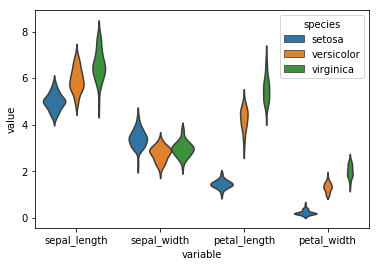

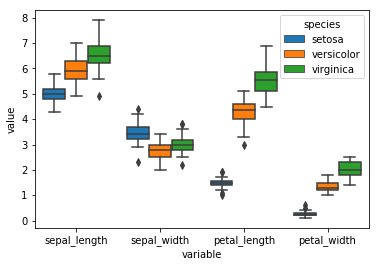

In [10]:
sns.violinplot('variable', 'value', data = df_melt
               , hue = 'species'
               , inner = None ## removes inner boxes
              )
plt.show()

sns.boxplot('variable', 'value', data = df_melt
            , hue = 'species'
            , saturation = 1
           )

plt.show()

# Summary

Personally I find pure matplotlib very cumbersome. However `seaborn` provides some nice defaults and supports the long data format. However if you want to plot something a bit more complicated then their showcase examples you get stuck tweaking the plots in `matplotlib`. There is a python version of the `ggplot` which I hear is quite popular and a newr package called `altair` which is also meant to work on long format. However there does not seem anything in the `python` world that beats pure `ggplot2`. I will rather keep using the original, in a later post I will show you how you can mix up `R` and `python` code in a single jupyter notebook and how to pass variables between the two environments.
